## Data summarization with CNN

https://huggingface.co/datasets/FinGPT/fingpt-fiqa_qa

In [28]:
import json
from datasets import load_dataset
ds = load_dataset("FinGPT/fingpt-fiqa_qa")

/home/dgxuser/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
ds

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'instruction'],
        num_rows: 17110
    })
})

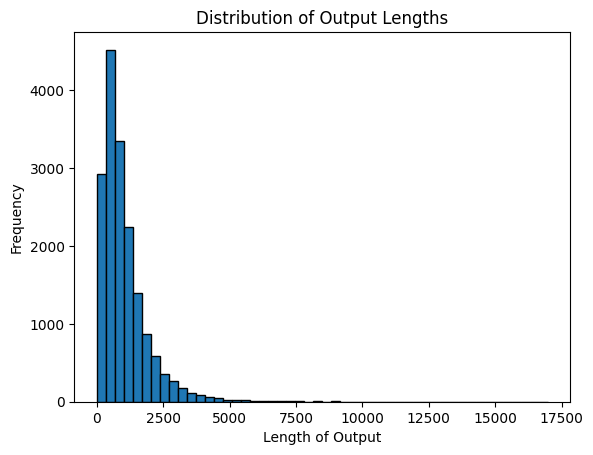

In [ ]:
import matplotlib.pyplot as plt

list_output = [len(output_ds) for output_ds in ds['train']['output']]

plt.hist(list_output, bins=50, edgecolor='black')
plt.title('Distribution of Output Lengths')
plt.xlabel('Length of Output')
plt.ylabel('Frequency')
plt.show()


In [13]:
ds_1000 = ds['train']['output'][:1000]

In [14]:
!nvidia-smi

Wed Nov 13 08:23:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           On  | 00000000:06:00.0 Off |                    0 |
| N/A   42C    P0              61W / 300W |   2461MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [18]:
from transformers import pipeline
from tqdm import tqdm
import time
import torch

def batch_summarize(texts, model_name="facebook/bart-large-cnn", use_gpu=False):
    """
    Text Summarization Function

    Args:
    texts (list): List of texts to summarize
    model_name (str): Name of the summarized model
    use_gpu (bool): Whether to use GPU

    Returns:
    list: List of summarized texts
    """
    # Initialize the summary pipeline
    device = 0 if use_gpu and torch.cuda.is_available() else -1
    summarizer = pipeline(
        "summarization",
        model=model_name,
        device=device
    )
    
    summaries = []
    
    # tqdm
    for text in tqdm(texts, desc="Summarizing"):
        try:
            # Handling empty or too short text
            if not text or len(text.split()) < 10:
                summaries.append(text)
                continue
                
            summary = summarizer(
                text,
                max_length=200,
                min_length=50,
                do_sample=False,
                num_beams=5,
                temperature=0.2,
                no_repeat_ngram_size=3
            )
            summaries.append(summary[0]['summary_text'])
            
            # Short wait for API limits or server load
            time.sleep(0.1)
            
        except Exception as e:
            print(f"Error summarizing text: {str(e)[:100]}...")
            summaries.append("Error in summarization")
            
    return summaries

# Data Summary: GPU Disabled
summaries = batch_summarize(ds_1000, use_gpu=False)

# Result
print(f"Total texts processed: {len(summaries)}")
print("\nexample of result:")
for i in range(min(3, len(summaries))):
    print(f"\noriginal text {i+1}:")
    print(ds_1000[i][:250] + "..." if len(ds_1000[i]) > 250 else ds_1000[i])
    print(f"\nsummary {i+1}:")
    print(summaries[i])
    print("-" * 80)

# If you want to save the results as a list or dataframe:
import pandas as pd

summary_df = pd.DataFrame({
    'original_text': ds_1000,
    'summary': summaries
})

# CSV
summary_df.to_csv('text_summaries_1000.csv', index=False)


Summarizing:   2%|▏         | 18/1000 [00:44<31:30,  1.93s/it]

Error summarizing text: index out of range in self...


Summarizing:   5%|▍         | 47/1000 [01:51<36:34,  2.30s/it]Your max_length is set to 200, but your input_length is only 147. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=73)


Error summarizing text: index out of range in self...
Error summarizing text: index out of range in self...


Summarizing:   6%|▌         | 57/1000 [02:11<37:47,  2.41s/it]Your max_length is set to 200, but your input_length is only 187. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=93)


Error summarizing text: index out of range in self...


Summarizing:   8%|▊         | 79/1000 [03:01<36:38,  2.39s/it]Your max_length is set to 200, but your input_length is only 118. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=59)


Error summarizing text: index out of range in self...


Summarizing:  10%|█         | 105/1000 [03:58<36:15,  2.43s/it]Your max_length is set to 200, but your input_length is only 167. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=83)


Error summarizing text: index out of range in self...


Summarizing:  18%|█▊        | 181/1000 [06:58<30:11,  2.21s/it]Your max_length is set to 200, but your input_length is only 167. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=83)


Error summarizing text: index out of range in self...


Summarizing:  28%|██▊       | 279/1000 [10:39<22:47,  1.90s/it]

Error summarizing text: index out of range in self...


Summarizing:  55%|█████▌    | 550/1000 [21:21<18:52,  2.52s/it]

Error summarizing text: index out of range in self...


Summarizing:  64%|██████▍   | 638/1000 [24:43<13:37,  2.26s/it]

Error summarizing text: index out of range in self...


Summarizing:  84%|████████▍ | 843/1000 [32:57<05:45,  2.20s/it]

Error summarizing text: index out of range in self...


Summarizing:  88%|████████▊ | 877/1000 [34:14<04:28,  2.18s/it]Your max_length is set to 200, but your input_length is only 169. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=84)


Error summarizing text: index out of range in self...


Summarizing:  88%|████████▊ | 879/1000 [34:17<03:38,  1.81s/it]

Error summarizing text: index out of range in self...


Summarizing:  97%|█████████▋| 968/1000 [37:43<01:14,  2.32s/it]Your max_length is set to 200, but your input_length is only 111. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)


Error summarizing text: index out of range in self...


Summarizing: 100%|██████████| 1000/1000 [38:57<00:00,  2.34s/it]

Total texts processed: 1000

예시 결과:

원본 텍스트 1:
The IRS Guidance pertaining to the subject.  In general the best I can say is your business expense may be deductible.  But it depends on the circumstances and what it is you want to deduct. Travel Taxpayers who travel away from home on business may ...

요약 1:
Taxpayers who travel away from home on business may deduct related   expenses. Expenses must be reasonable   and appropriate; deductions for extravagant expenses are not   allowable. For travel in 2010, the rate for most small   localities in the United States is $46 a day.
--------------------------------------------------------------------------------

원본 텍스트 2:
Yes you can claim your business deductions if you are not making any income yet. But first you should decide what structure you want to have for your business. Either a Company structure or a Sole Trader or Partnership. Company Structure If you choos...

요약 2:
Yes you can claim your business deductions if you are not making

In [20]:
import pandas as pd
summary_1000 = pd.read_csv('text_summaries_1000.csv')
summary_1000

,original_text,summary
0,The IRS Guidance pertaining to the subject. I...,Taxpayers who travel away from home on busines...
1,Yes you can claim your business deductions if ...,Yes you can claim your business deductions if ...
2,You should have separate files for each of the...,You should have separate files for each of the...
3,Having a separate checking account for the bus...,Having a separate checking account for the bus...
4,"You don't specify which country you are in, so...",You shouldn't co-mingle business expenses with...
...,...,...
995,"You can do it, provided that the bedroom is ON...","You can do it, provided that the bedroom is ON..."
996,Why would the IRS be coming after you if you r...,"If you reported everything, then the IRS will ..."
997,Simply file an amended return to correct the m...,This happens all the time and is a standard pr...
998,No. Current account is not a requirement. You ...,No. Current account is not a requirement. You ...


In [2]:
summary_1000 = summary_1000.reset_index(names=['number'])

In [3]:
summary_1000

,number,original_text,summary
0,0,The IRS Guidance pertaining to the subject. I...,Taxpayers who travel away from home on busines...
1,1,Yes you can claim your business deductions if ...,Yes you can claim your business deductions if ...
2,2,You should have separate files for each of the...,You should have separate files for each of the...
3,3,Having a separate checking account for the bus...,Having a separate checking account for the bus...
4,4,"You don't specify which country you are in, so...",You shouldn't co-mingle business expenses with...
...,...,...,...
995,995,"You can do it, provided that the bedroom is ON...","You can do it, provided that the bedroom is ON..."
996,996,Why would the IRS be coming after you if you r...,"If you reported everything, then the IRS will ..."
997,997,Simply file an amended return to correct the m...,This happens all the time and is a standard pr...
998,998,No. Current account is not a requirement. You ...,No. Current account is not a requirement. You ...


In [7]:
merge_ds_1000 = pd.read_csv('merge_ds_1000.csv')
merge_ds_1000.head()

,Unnamed: 0,index,0,original_text,summary
0,0,0,What is considered a business expense on a bus...,The IRS Guidance pertaining to the subject. I...,Taxpayers who travel away from home on busines...
1,1,1,Claiming business expenses for a business with...,Yes you can claim your business deductions if ...,Yes you can claim your business deductions if ...
2,2,2,Transferring money from One business checking ...,You should have separate files for each of the...,You should have separate files for each of the...
3,3,3,Having a separate bank account for business/in...,Having a separate checking account for the bus...,Having a separate checking account for the bus...
4,4,4,Having a separate bank account for business/in...,"You don't specify which country you are in, so...",You shouldn't co-mingle business expenses with...


In [10]:
merge_ds_1000 = merge_ds_1000.drop(columns='Unnamed: 0')

In [11]:
merge_ds_1000.columns = ['index', 'question', 'original_text', 'summary']

In [12]:
merge_ds_1000.head()

,index,question,original_text,summary
0,0,What is considered a business expense on a bus...,The IRS Guidance pertaining to the subject. I...,Taxpayers who travel away from home on busines...
1,1,Claiming business expenses for a business with...,Yes you can claim your business deductions if ...,Yes you can claim your business deductions if ...
2,2,Transferring money from One business checking ...,You should have separate files for each of the...,You should have separate files for each of the...
3,3,Having a separate bank account for business/in...,Having a separate checking account for the bus...,Having a separate checking account for the bus...
4,4,Having a separate bank account for business/in...,"You don't specify which country you are in, so...",You shouldn't co-mingle business expenses with...


In [13]:
import json

final_prompt_list = []

for idx, row in merge_ds_1000.iterrows():
    # instruction = row['instruction']
    question = row['question']
    answer = row['summary']

    prompt = f"{idx} Below is an instruction that describes a task. ### Instruction: {question} ### Response: {answer}"

    prompt_dict = {}
    prompt_dict['text'] = prompt
    final_prompt_list.append(prompt_dict)


with open('finance_merge_ds_1000.json', 'w', encoding = 'utf-8') as f:
    f.write('[\n')
    for i, item in enumerate(final_prompt_list):
        json_str = json.dumps(item, ensure_ascii=False) #Korean =False, English = True
        f.write(json_str)
        if i < len(final_prompt_list)-1:
            f.write(',\n')
        else:
            f.write('\n')
    f.write(']\n')

In [17]:
final_prompt_list[:10]

[{'text': '0 Below is an instruction that describes a task. ### Instruction: What is considered a business expense on a business trip? ### Response: Taxpayers who travel away from home on business may deduct related   expenses. Expenses must be reasonable   and appropriate; deductions for extravagant expenses are not   allowable. For travel in 2010, the rate for most small   localities in the United States is $46 a day.'},
 {'text': '1 Below is an instruction that describes a task. ### Instruction: Claiming business expenses for a business with no income ### Response: Yes you can claim your business deductions if you are not making any income yet. But first you should decide what structure you want to have for your business. Either a Company structure or a Sole Trader or Partnership. If you choose a Company Structure (which is more expensive to set up) you would claim your deductions but no income. So you would be making a loss, and continue making losses until your income from the bus